# pHash algorithm

In [1]:
from PIL import Image, ImageOps
import numpy as np
import sys
from matplotlib import pyplot as plt, ticker
from scipy.fftpack import dct, idct

In [2]:
HASH_SIZE = 8
IMG_SIZE = 32

IMG_PATH = '../data/original/train/covid/COVID-19 (1).jpg'

DCT transformation

In [3]:
def dct2(a):
    return dct(dct(a, axis=0), axis=1)

In [4]:
def plot(img, size=0, gs=True, vmax=255):
    fig, ax = plt.subplots()
    if gs:
        plt.imshow(img, cmap='gray', vmin=0, vmax=vmax)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(size / 8))
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(size / 16))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(size / 8))
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(size / 16))
    else:
        plt.imshow(img)
        plt.axis('off')
    plt.show()

## Hashing process
Load an image from a path

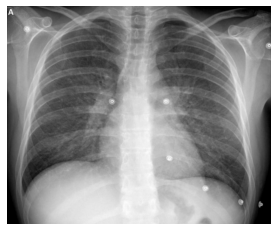

In [5]:
image = Image.open(IMG_PATH)
plot(image, gs=False)

Convert to grayscale and resize the image

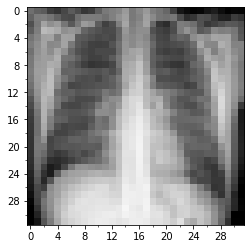

In [6]:
img = image.convert("L").resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
plot(img, IMG_SIZE)

Perform the Discrete Cosine Transform

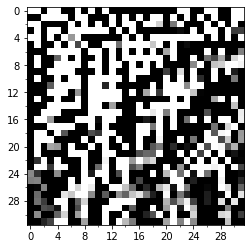

In [7]:
dct_img = dct2(np.asarray(img))
plot(dct_img, IMG_SIZE)

Select only the lowest frequencies in the upper left corner

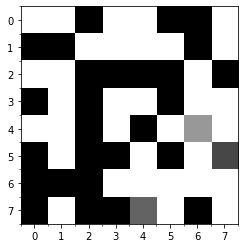

In [8]:
dct_lowfreq = dct_img[:HASH_SIZE, :HASH_SIZE]
plot(dct_lowfreq, HASH_SIZE)

Compute the median and set the pixels to 1 or 0

In [9]:
med = np.median(dct_lowfreq.flat[1:])
print(med)

414.6543992022783


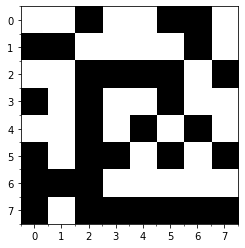

[[1 1 0 1 1 0 0 1]
 [0 0 1 1 1 1 0 1]
 [1 1 0 0 0 0 1 0]
 [0 1 0 1 1 0 1 1]
 [1 1 0 1 0 1 0 1]
 [0 1 0 0 1 0 1 0]
 [0 0 0 1 1 1 1 1]
 [0 1 0 0 0 0 0 0]]


In [10]:
diff = dct_lowfreq > med
plot(diff, HASH_SIZE, vmax=1)
print(np.array(diff, dtype=int))

Convert binary to hex

In [11]:
bit_string = ''.join(str(b) for b in 1 * diff.flatten())
width = int(np.ceil(len(bit_string)/4))
print('{:0>{width}x}'.format(int(bit_string, 2), width=width))

d93dc25bd54a1f40


Compare with imagehash library

In [12]:
import imagehash

phash = imagehash.phash(image)
print(phash)

d93dc25bd54a1f40
